<h1 style="text-align: center;">MLB Pitcher Comparison</h1>

# Loading Libraries

In [1]:
## pyb stuff
import pybaseball as pyb
from pybaseball import  playerid_lookup
from pybaseball import  statcast_pitcher
from pybaseball import pitching_stats
from pybaseball import batting_stats
from pybaseball import schedule_and_record

import pandas as pd 
pd.set_option('display.max_columns', None)

import numpy as np

## added yesterday's date so the data we get is updated everytime the statcast data cell is ran
from datetime import date, timedelta, datetime
today = date.today()
yesterday = today - timedelta(days=1)
formatted_date = yesterday.strftime("%Y-%m-%d")

import warnings
warnings.filterwarnings("ignore")

# Loading in the Data

In [4]:
## the code below to run the data takes like 5 1/2 min to run but we get 4 years worth of data
start_date = '2024-03-01'
end_date = '2025-08-01'

statcast_data = pyb.statcast(start_date, end_date)

statcast_data = statcast_data.sort_values(by='game_date').reset_index(drop=True)
statcast_data = statcast_data[~statcast_data['pitch_type'].isna()].sort_values(by='game_date').reset_index(drop=True) ## gets rid of the null pitches
statcast_data.head()

This is a large query, it may take a moment to complete
Skipping offseason dates
Skipping offseason dates


100%|██████████| 386/386 [01:49<00:00,  3.51it/s]


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,FF,2024-03-15,93.8,-1.45,6.17,"Houser, Adrian",608336,605288,NaN,foul,<NA>,<NA>,<NA>,<NA>,11,Joey Gallo pops out to catcher Francisco Alvar...,S,L,R,NYM,WSH,S,<NA>,NaN,0,0,2024,-0.76,1.26,-0.88,2.99,<NA>,<NA>,<NA>,2,1,Top,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3.157271,-136.531806,-5.310178,-10.239995,29.364474,-15.430712,3.43,1.73,258,80.4,54,94.3,2275,6.5,747961,682626,668901,621563,683146,596019,621466,664056,516782,53.99,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4,1,4-Seam Fastball,0,1,1,0,1,0,1,0,Infield shade,Standard,222,0.0,-0.041,<NA>,<NA>,<NA>,0.041,88.0,-1,1,0.433,0.567,31,30,31,31,1,0,<NA>,<NA>,<NA>,<NA>,1.32,0.76,-0.76,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,FF,2024-03-15,94.4,-2.21,6.03,"Smith-Shawver, AJ",608348,700363,field_out,hit_into_play,<NA>,<NA>,<NA>,<NA>,8,Carson Kelly flies out to right fielder Eli Wh...,S,R,R,DET,ATL,X,9,fly_ball,1,0,2024,-0.85,1.65,-0.17,1.68,<NA>,682985,<NA>,1,3,Bot,193.19,114.21,<NA>,<NA>,<NA>,<NA>,7.28227,-137.035703,-9.388771,-12.290337,30.408892,-9.464813,3.28,1.61,268,91.1,47,95.3,2118,6.9,747956,644433,621566,645277,641645,606115,672284,671739,642201,53.56,0.003,<NA>,0.0,<NA>,0,0,3,24,2,4-Seam Fastball,4,0,4,0,0,4,4,0,Standard,Standard,212,-0.011,-0.289,<NA>,<NA>,0.006,0.289,91.1,4,4,0.909,0.909,21,29,22,30,2,1,<NA>,<NA>,<NA>,<NA>,0.92,0.85,0.85,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,SL,2024-03-15,86.5,-2.46,6.08,"Smith-Shawver, AJ",570482,700363,NaN,swinging_strike,<NA>,<NA>,<NA>,<NA>,5,Gio Urshela singles on a line drive to center ...,S,R,R,DET,ATL,S,<NA>,NaN,1,0,2024,0.21,0.54,-0.23,2.86,678009,<NA>,<NA>,0,3,Bot,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4.94394,-126.116968,-2.745282,1.454022,19.936556,-26.01901,3.46,1.68,<NA>,<NA>,<NA>,88.2,2120,6.7,747956,644433,621566,645277,641645,606115,672284,671739,642201,53.78,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,21,2,Slider,2,0,2,0,0,2,2,0,Strategic,Standard,220,0.0,-0.093,<NA>,<NA>,<NA>,0.093,<NA>,2,2,0.836,0.836,21,32,22,33,2,1,<NA>,<NA>,<NA>,<NA>,2.44,-0.21,-0.21,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,CU,2024-03-15,74.1,-2.17,6.06,"Smith-Shawver, AJ",570482,700363,NaN,ball,<NA>,<NA>,<NA>,<NA>,11,Gio Urshela singles on a line drive to center ...,S,R,R,DET,ATL,B,<NA>,NaN,1,1,2024,1.02,-1.06,-0.91,3.55,678009,<NA>,<NA>,0,3,Bot,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.800755,-107.839599,4.028733,7.814088,18.8554,-41.388552,3.46,1.68,<NA>,<NA>,<NA>,74.8,2246,6.8,747956,644433,621566,645277,641645,606115,672284,671739,642201,53.65,<NA>,<NA>,<NA>,<NA>,<N

In [5]:
statcast_data.sample()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
87065,CU,2024-04-13,79.4,3.06,5.71,"Hall, DL",623993,669084,NaN,foul,<NA>,<NA>,<NA>,<NA>,13,Anthony Santander hit by pitch.,R,R,L,BAL,MIL,S,<NA>,NaN,0,0,2024,-1.33,-1.03,-0.86,1.58,<NA>,<NA>,<NA>,2,1,Bot,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,-6.145533,-115.498685,-0.333002,-10.791463,20.856464,-41.561152,3.3,1.59,5,83.0,-19,80.2,2551,6.8,747054,661388,641343,668930,686554,642715,686217,663368,694192,53.71,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7,1,Curveball,1,0,1,0,0,1,1,0,Standard,Standard,319,0.0,-0.041,72.8,8.7,<NA>,0.041,88.0,1,1,0.617,0.617,25,29,26,30,1,0,7,1,7,1,4.64,-1.33,1.33,47.4,19.228029,-23.947799,35.940861,29.407186,40.479554


In [6]:
statcast_data['pitch_type'].unique()

array(['FF', 'SL', 'CU', 'ST', 'FS', 'SI', 'CH', 'FC', 'SV', 'KC', 'FO',
       'SC', 'CS', 'PO', 'KN', 'FA', 'EP'], dtype=object)

# Helper Functions

In [7]:
def pitcher_lookup_stats(player_name: str, player_id: int) -> pd.DataFrame:
    """
    Finds all of the pitches for some player from the past 2 seasons
    
    Arguments: player_name: the name of a pitcher (format: Last Name, First Name), player_id: placeholder (unless there's a pitcher with the same name with different ids)
    """
    df = statcast_data[statcast_data['player_name'] == player_name].sort_values(by='game_date').reset_index(drop=True).copy()

    if len(df['pitcher'].unique()) > 1:
        print("There's a pitcher with the same name --> Find out their ID")
        return np.nan
    else:
        pitcher_stats = statcast_data[statcast_data['pitcher'] == df['pitcher'].unique()[0]]

    return pitcher_stats

# EDA

In [8]:
## example use of the `pitcher_lookup_stats` function --> you can just put whatever number in the second parameter (it's a placeholder)
## put in a name that's in the format 'LastName, FirstName' e.g., 'Woo, Bryan'
pitcher_lookup_stats('Woo, Bryan', 0)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
188146,SI,2024-05-10,94.2,-1.74,4.98,"Woo, Bryan",647351,693433,NaN,ball,<NA>,<NA>,<NA>,<NA>,12,Abraham Toro flies out to right fielder Mitch ...,R,L,R,SEA,OAK,B,<NA>,NaN,0,0,2024,-1.27,0.84,0.42,3.85,<NA>,<NA>,<NA>,0,1,Top,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8.433675,-136.951673,0.889047,-17.817924,28.226144,-21.965867,3.24,1.59,<NA>,<NA>,<NA>,94.5,2113,6.4,745264,663728,664034,668942,649966,664238,670042,677594,571745,54.11,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,1,Sinker,0,0,0,0,0,0,0,0,Infield shade,Standard,228,0.0,0.038,<NA>,<NA>,<NA>,-0.038,<NA>,0,0,0.5,0.5,24,27,24,28,1,0,<NA>,2,5,1,1.72,1.27,-1.27,23.7,<NA>,<NA>,<NA>,<NA>,<NA>
188147,SI,2024-05-10,95.3,-1.6,4.95,"Woo, Bryan",647351,693433,NaN,called_strike,<NA>,<NA>,<NA>,<NA>,2,Abraham Toro flies out to right fielder Mitch ...,R,L,R,SEA,OAK,S,<NA>,NaN,1,0,2024,-1.37,0.56,0.26,3.31,<NA>,<NA>,<NA>,0,1,Top,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8.027317,-138.569672,0.101134,-19.471874,33.048408,-25.231018,3.21,1.59,<NA>,<NA>,<NA>,95.6,2173,6.7,745264,663728,664034,668942,649966,664238,670042,677594,571745,53.84,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,2,Sinker,0,0,0,0,0,0,0,0,Infield shade,Standard,225,0.0,-0.049,<NA>,<NA>,<NA>,0.049,<NA>,0,0,0.5,0.5,24,27,24,28,1,0,<NA>,2,5,1,1.97,1.37,-1.37,25.3,<NA>,<NA>,<NA>,<NA>,<NA>
188148,FF,2024-05-10,94.6,-1.61,4.91,"Woo, Bryan",647351,693433,field_out,hit_into_play,<NA>,<NA>,<NA>,<NA>,5,Abraham Toro flies out to right fielder Mitch ...,R,L,R,SEA,OAK,X,9,fly_ball,1,1,2024,-0.87,1.2,0.18,2.58,<NA>,<NA>,<NA>,0,1,Top,181.12,79.46,<NA>,<NA>,<NA>,<NA>,6.632181,-137.5891,-3.072366,-12.488535,31.616601,-16.496432,3.33,1.53,325,93.6,23,94.8,2223,6.5,745264,663728,664034,668942,649966,664238,670042,677594,571745,53.98,0.157,0.187,0.0,1,0,0,3,1,3,4-Seam Fastball,0,0,0,0,0,0,0,0,Infield shade,Standard,231,0.022,-0.243,76.7,7.4,0.302,0.243,93.6,0,0,0.5,0.5,24,27,24,28,1,0,<NA>,2,5,1,1.36,0.87,-0.87,22.2,8.386804,-5.771971,33.821583,32.521598,35.648832
188149,FF,2024-05-10,95.3,-1.83,4.89,"Woo, Bryan",668709,693433,NaN,ball,<NA>,<NA>,<NA>,<NA>,11,JJ Bleday walks.,R,L,R,SEA,OAK,B,<NA>,NaN,0,0,2024,-1.17,1.01,-1.62,2.81,<NA>,<NA>,<NA>,1,1,Top,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,3.201974,-138.700517,-2.077365,-15.826139,33.658623,-18.950484,3.31,1.53,<NA>,<NA>,<NA>,95.3,2383,6.5,745264,663728,664034,668942,649966,664238,670042,677594,571745,54.02,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2,1,4-Seam Fastball,0,0,0,0,0,0,0,0,Infield shade,

In [207]:
# Group MLB pitchers by a number of metrics
mlb_pitchers = statcast_data.groupby(['pitcher', 'pitch_name']).agg(pitcher_name = ('player_name', 'max'),
                                                                     handedness = ('p_throws', 'max'),
                                                                     count_pitch = ('player_name', 'count'),
                                                                     spin_rate = ('release_spin_rate', 'mean'),
                                                                     release_speed = ('release_speed', 'mean'), 
                                                                     horz_break = ('pfx_x', 'mean'), 
                                                                     vert_break = ('pfx_z', 'mean'), 
                                                                     extension = ('release_extension', 'mean'), 
                                                                     spin_axis = ('spin_axis', 'mean')
                                                                     ).reset_index()

# Adjust pfx_x and pfx_z to inches (i think?)
mlb_pitchers['horz_break'] = mlb_pitchers['horz_break'] * 12
mlb_pitchers['vert_break'] = mlb_pitchers['vert_break'] * 12
mlb_pitchers

# #Filter for pitches that have been thrown > 30 times
# major_grouped = mlb_pitchers[mlb_pitchers['count_pitch'] > 30].drop(columns = ['count_pitch', 'pitcher'])
# major_grouped

,pitcher,pitch_name,pitcher_name,handedness,count_pitch,spin_rate,release_speed,horz_break,vert_break,extension,spin_axis
0,434378,4-Seam Fastball,"Verlander, Justin",R,1525,2413.517377,93.785246,-8.811541,18.912551,6.01941,207.050492
1,434378,Changeup,"Verlander, Justin",R,299,1754.688963,84.458863,-13.339666,9.406957,6.045485,229.528428
2,434378,Curveball,"Verlander, Justin",R,564,2705.196809,78.056915,7.393404,-12.81234,5.998227,38.251773
3,434378,Sinker,"Verlander, Justin",R,2,2444.0,91.2,-12.0,17.28,5.8,202.5
4,434378,Slider,"Verlander, Justin",R,696,2466.734195,87.179741,3.889828,5.957586,6.048851,170.975575
...,...,...,...,...,...,...,...,...,...,...,...
6093,829272,4-Seam Fastball,"Ogasawara, Shinnosuke",L,35,2173.657143,90.86,7.494857,15.668571,6.26,142.857143
6094,829272,Changeup,"Ogasawara, Shinnosuke",L,22,1648.363636,80.25,14.514545,8.394545,6.145455,128.227273
6095,829272,Knuckle Curve,"Ogasawara, Shinnosuke",L,28,2720.642857,71.692857,-6.882857,-20.134286,5.964286,342.071429
6096,829272,Slider,"Ogasawara, Shinnosuke",L,23,2454.913043,81.413043,-1.883478,2.13913,6.152174,216.391304


In [208]:
pitch_type = ['4-Seam Fastball', 'Changeup', 'Slider', 'Curveball', 'Cutter', 'Sinker', 'Split-Finger', 'Sweeper']
features = ['spin_rate', 'release_speed', 'horz_break', 'vert_break', 'extension', 'spin_axis']

In [209]:
# Create pitcher vector dataframe
final_vectors = []
pitcher_names = []

# Loop over each pitcher
for pitcher_name in mlb_pitchers['pitcher_name'].unique():
    pitcher_data = mlb_pitchers[mlb_pitchers['pitcher_name'] == pitcher_name]
    vec = []

    # For each standard pitch type, grab metrics if it exists
    for pt in pitch_type:
        pitch_row = pitcher_data[pitcher_data['pitch_name'] == pt]
        if not pitch_row.empty:
            vals = pitch_row[features].iloc[0].values  # ensure 1D
        else:
            vals = np.zeros(len(features))  # or np.nan
        vec.extend(vals)

    final_vectors.append(vec)
    pitcher_names.append(pitcher_name)

# Step 3: build column names
column_names = []
for pt in pitch_type:
    for f in features:
        column_names.append(f"{pt}_{f}")

# Step 4: create DataFrame
vectors_df = pd.DataFrame(final_vectors, columns=column_names)
vectors_df.insert(0, 'pitcher', pitcher_names)
vectors_df = vectors_df.rename(columns = {'pitcher': 'pitcher_name'})
display(vectors_df)

,pitcher_name,4-Seam Fastball_spin_rate,4-Seam Fastball_release_speed,4-Seam Fastball_horz_break,4-Seam Fastball_vert_break,4-Seam Fastball_extension,4-Seam Fastball_spin_axis,Changeup_spin_rate,Changeup_release_speed,Changeup_horz_break,Changeup_vert_break,Changeup_extension,Changeup_spin_axis,Slider_spin_rate,Slider_release_speed,Slider_horz_break,Slider_vert_break,Slider_extension,Slider_spin_axis,Curveball_spin_rate,Curveball_release_speed,Curveball_horz_break,Curveball_vert_break,Curveball_extension,Curveball_spin_axis,Cutter_spin_rate,Cutter_release_speed,Cutter_horz_break,Cutter_vert_break,Cutter_extension,Cutter_spin_axis,Sinker_spin_rate,Sinker_release_speed,Sinker_horz_break,Sinker_vert_break,Sinker_extension,Sinker_spin_axis,Split-Finger_spin_rate,Split-Finger_release_speed,Split-Finger_horz_break,Split-Finger_vert_break,Split-Finger_extension,Split-Finger_spin_axis,Sweeper_spin_rate,Sweeper_release_speed,Sweeper_horz_break,Sweeper_vert_break,Sweeper_extension,Sweeper_spin_axis
0,"Verlander, Justin",2413.517377,93.785246,-8.811541,18.912551,6.01941,207.050492,1754.688963,84.458863,-13.339666,9.406957,6.045485,229.528428,2466.734195,87.179741,3.889828,5.957586,6.048851,170.975575,2705.196809,78.056915,7.393404,-12.81234,5.998227,38.251773,0.0,0.0,0.0,0.0,0.0,0.0,2444.0,91.2,-12.0,17.28,5.8,202.5,0.0,0.0,0.0,0.0,0.0,0.0,2633.45098,79.960784,12.329412,-1.903529,6.089216,48.607843
1,"Jansen, Kenley",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2430.238095,82.790476,6.91,-3.422857,6.734524,75.154762,0.0,0.0,0.0,0.0,0.0,0.0,2607.36755,92.410348,4.516291,18.024139,6.814901,177.268212,2288.52381,93.173228,-6.702992,19.337008,6.911811,188.31746,0.0,0.0,0.0,0.0,0.0,0.0,2550.5,81.313158,14.210526,2.542105,6.678947,61.289474
2,"Chavez, Jesse",0.0,0.0,0.0,0.0,0.0,0.0,1865.192308,84.923626,-16.016703,1.954286,6.35,254.324176,2411.041667,81.2,5.175,-5.49,6.295833,64.083333,2552.581395,75.490698,15.749302,-8.273023,6.317442,64.232558,2198.02381,88.69254,-1.878286,12.523238,6.247302,213.398413,1985.977716,90.508635,-16.028858,7.557994,6.25571,228.389972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Hill, Rich",2228.666667,88.372,4.8416,16.2096,6.56,149.613333,1702.0,81.25,13.92,5.58,6.65,132.0,0.0,0.0,0.0,0.0,0.0,0.0,2573.313433,72.414925,-17.265672,-9.345672,6.329851,304.955224,2285.5,83.847222,-2.29,8.216667,6.391667,175.361111,2156.730769,86.157692,13.324615,9.313846,6.465385,123.538462,0.0,0.0,0.0,0.0,0.0,0.0,2550.138889,70.708333,-21.413333,1.056667,6.219444,274.833333
4,"Morton, Charlie",2279.877337,94.132909,-12.886582,11.342737,6.164794,239.726253,2043.226531,85.847959,-16.021714,-1.037878,6.276122,267.191837,0.0,0.0,0.0,0.0,0.0,0.0,3111.205087,81.448331,14.368649,-8.942067,6.100212,61.471118,2469.537634,88.345968,0.328065,5.666774,6.181183,206.134409,2171.100548,93.745155,-17.506837,3.943766,6.177148,244.170018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,"Craig, Luke",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2520.0,80.877778,-6.8,-0.666667,5.944444,285.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2313.545455,92.322727,14.225455,11.001818,5.881818,116.136364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1388,"Bryant, Tyler",2307.3,95.205,-5.412,14.982,6.7,206.15,0.0,0.0,0.0,0.0,0.0,0.0,2425.0,84.716667,6.6,0.5,6.583333,100.166667,2272.5,83.433333,11.8,-7.4,6.483333,102.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1389,"Garkow, Nate",2284.181818,88.763636,-6.250909,21.872727,6.218182,194.272727,1509.0,74.2,-11.88,17.52,6.4,216.0,1644.375,77.00625,-6.99,15.525,6.36875,219.0,2278.5,77.15,-3.66,-5.34,6.25,9.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1390,"Todd, Jonathan",2419.75,94.2625

In [210]:
# Add handedness
mlb_vectors_withhand = vectors_df.merge(mlb_pitchers, on = ['pitcher_name'], how = 'left')
mlb_vectors_withhand = mlb_vectors_withhand.drop(columns = ['pitcher', 'pitch_name', 'spin_rate', 'release_speed',	'horz_break', 'vert_break', 'extension', 'spin_axis'])
mlb_vectors_withhand

,pitcher_name,4-Seam Fastball_spin_rate,4-Seam Fastball_release_speed,4-Seam Fastball_horz_break,4-Seam Fastball_vert_break,4-Seam Fastball_extension,4-Seam Fastball_spin_axis,Changeup_spin_rate,Changeup_release_speed,Changeup_horz_break,Changeup_vert_break,Changeup_extension,Changeup_spin_axis,Slider_spin_rate,Slider_release_speed,Slider_horz_break,Slider_vert_break,Slider_extension,Slider_spin_axis,Curveball_spin_rate,Curveball_release_speed,Curveball_horz_break,Curveball_vert_break,Curveball_extension,Curveball_spin_axis,Cutter_spin_rate,Cutter_release_speed,Cutter_horz_break,Cutter_vert_break,Cutter_extension,Cutter_spin_axis,Sinker_spin_rate,Sinker_release_speed,Sinker_horz_break,Sinker_vert_break,Sinker_extension,Sinker_spin_axis,Split-Finger_spin_rate,Split-Finger_release_speed,Split-Finger_horz_break,Split-Finger_vert_break,Split-Finger_extension,Split-Finger_spin_axis,Sweeper_spin_rate,Sweeper_release_speed,Sweeper_horz_break,Sweeper_vert_break,Sweeper_extension,Sweeper_spin_axis,handedness,count_pitch
0,"Verlander, Justin",2413.517377,93.785246,-8.811541,18.912551,6.01941,207.050492,1754.688963,84.458863,-13.339666,9.406957,6.045485,229.528428,2466.734195,87.179741,3.889828,5.957586,6.048851,170.975575,2705.196809,78.056915,7.393404,-12.81234,5.998227,38.251773,0.0,0.0,0.0,0.0,0.0,0.0,2444.0,91.2,-12.0,17.28,5.8,202.5,0.0,0.0,0.0,0.0,0.0,0.0,2633.45098,79.960784,12.329412,-1.903529,6.089216,48.607843,R,1525
1,"Verlander, Justin",2413.517377,93.785246,-8.811541,18.912551,6.01941,207.050492,1754.688963,84.458863,-13.339666,9.406957,6.045485,229.528428,2466.734195,87.179741,3.889828,5.957586,6.048851,170.975575,2705.196809,78.056915,7.393404,-12.81234,5.998227,38.251773,0.0,0.0,0.0,0.0,0.0,0.0,2444.0,91.2,-12.0,17.28,5.8,202.5,0.0,0.0,0.0,0.0,0.0,0.0,2633.45098,79.960784,12.329412,-1.903529,6.089216,48.607843,R,299
2,"Verlander, Justin",2413.517377,93.785246,-8.811541,18.912551,6.01941,207.050492,1754.688963,84.458863,-13.339666,9.406957,6.045485,229.528428,2466.734195,87.179741,3.889828,5.957586,6.048851,170.975575,2705.196809,78.056915,7.393404,-12.81234,5.998227,38.251773,0.0,0.0,0.0,0.0,0.0,0.0,2444.0,91.2,-12.0,17.28,5.8,202.5,0.0,0.0,0.0,0.0,0.0,0.0,2633.45098,79.960784,12.329412,-1.903529,6.089216,48.607843,R,564
3,"Verlander, Justin",2413.517377,93.785246,-8.811541,18.912551,6.01941,207.050492,1754.688963,84.458863,-13.339666,9.406957,6.045485,229.528428,2466.734195,87.179741,3.889828,5.957586,6.048851,170.975575,2705.196809,78.056915,7.393404,-12.81234,5.998227,38.251773,0.0,0.0,0.0,0.0,0.0,0.0,2444.0,91.2,-12.0,17.28,5.8,202.5,0.0,0.0,0.0,0.0,0.0,0.0,2633.45098,79.960784,12.329412,-1.903529,6.089216,48.607843,R,2
4,"Verlander, Justin",2413.517377,93.785246,-8.811541,18.912551,6.01941,207.050492,1754.688963,84.458863,-13.339666,9.406957,6.045485,229.528428,2466.734195,87.179741,3.889828,5.957586,6.048851,170.975575,2705.196809,78.056915,7.393404,-12.81234,5.998227,38.251773,0.0,0.0,0.0,0.0,0.0,0.0,2444.0,91.2,-12.0,17.28,5.8,202.5,0.0,0.0,0.0,0.0,0.0,0.0,2633.45098,79.960784,12.329412,-1.903529,6.089216,48.607843,R,696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6093,"Ogasawara, Shinnosuke",2173.657143,90.86,7.494857,15.668571,6.26,142.857143,1648.363636,80.25,14.514545,8.394545,6.145455,128.227273,2454.913043,81.413043,-1.883478,2.13913,6.152174,216.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2746.666667,76.533333,-12.64,-10.64,5.933333,320.666667,L,35
6094,"Ogasawara, Shinnosuke",2173.657143,90.86,7.494857,15.668571,6.26,142.857143,1648.363636,80.25,14.514545,8.394545,6.145455,128.227273,2454.913043,81.413043,-1.883478,2.13913,6.152174,216.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2746.666667,76.533333,-12.64,-10.64,5.933333,320.6

In [211]:
trackman = pd.read_csv('../../Files/merged_trackman_games.csv')
trackman

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,BatterId,BatterSide,BatterTeam,PitcherSet,Inning,Top/Bottom,Outs,Balls,Strikes,TaggedPitchType,AutoPitchType,PitchCall,KorBB,TaggedHitType,PlayResult,Runner1st,Runner2nd,Runner3rd,OutsOnPlay,RunsScored,RelSpeed,VertRelAngle,HorzRelAngle,SpinRate,SpinAxis,Tilt,RelHeight,RelSide,Extension,VertBreak,InducedVertBreak,HorzBreak,PlateLocHeight,PlateLocSide,ZoneSpeed,VertApprAngle,HorzApprAngle,ZoneTime,ExitSpeed,Angle,Direction,HitSpinRate,PositionAt110X,PositionAt110Y,PositionAt110Z,Distance,LastTrackedDistance,Bearing,HangTime,pfxx,pfxz,x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0,HomeTeam,AwayTeam,Stadium,Level,League,GameID,PitchUID,EffectiveVelo,MaxHeight,MeasuredDuration,SpeedDrop,PitchLastMeasuredX,PitchLastMeasuredY,PitchLastMeasuredZ,ContactPositionX,ContactPositionY,ContactPositionZ,GameUID,UTCDate,UTCTime,LocalDateTime,UTCDateTime,AutoHitType,System,HomeTeamForeignID,AwayTeamForeignID,GameForeignID,Catcher,CatcherId,CatcherThrows,CatcherTeam,PlayID,PitchTrajectoryXc0,PitchTrajectoryXc1,PitchTrajectoryXc2,PitchTrajectoryYc0,PitchTrajectoryYc1,PitchTrajectoryYc2,PitchTrajectoryZc0,PitchTrajectoryZc1,PitchTrajectoryZc2,HitSpinAxis,HitTrajectoryXc0,HitTrajectoryXc1,HitTrajectoryXc2,HitTrajectoryXc3,HitTrajectoryXc4,HitTrajectoryXc5,HitTrajectoryXc6,HitTrajectoryXc7,HitTrajectoryXc8,HitTrajectoryYc0,HitTrajectoryYc1,HitTrajectoryYc2,HitTrajectoryYc3,HitTrajectoryYc4,HitTrajectoryYc5,HitTrajectoryYc6,HitTrajectoryYc7,HitTrajectoryYc8,HitTrajectoryZc0,HitTrajectoryZc1,HitTrajectoryZc2,HitTrajectoryZc3,HitTrajectoryZc4,HitTrajectoryZc5,HitTrajectoryZc6,HitTrajectoryZc7,HitTrajectoryZc8,ThrowSpeed,PopTime,ExchangeTime,TimeToBase,CatchPositionX,CatchPositionY,CatchPositionZ,ThrowPositionX,ThrowPositionY,ThrowPositionZ,BasePositionX,BasePositionY,BasePositionZ,ThrowTrajectoryXc0,ThrowTrajectoryXc1,ThrowTrajectoryXc2,ThrowTrajectoryYc0,ThrowTrajectoryYc1,ThrowTrajectoryYc2,ThrowTrajectoryZc0,ThrowTrajectoryZc1,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence,base_state,run_exp,count,delta_run_exp,re24
0,1,2/22/25,05:30.1,1,1,"Seid, Spencer",809262,Left,CSD_TRI,"Dumesnil, Nick",8.250940e+05,Right,CAL_LAN,Undefined,1,Top,0,0,0,Fastball,Four-Seam,BallCalled,Undefined,Undefined,Undefined,0.0,0.0,0.0,0,0,90.64925,0.432719,1.900443,2037.144708,156.551992,11:15,4.87015,-2.27294,5.37321,-16.36367,18.60084,-7.55091,3.91243,-1.11980,81.94319,-2.683311,0.559518,0.425584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.33244,9.52567,2.10803,50.0,4.89779,-4.00496,-131.38274,0.48208,7.51301,29.88203,-15.65521,CSD_TRI,CAL_LAN,UCSanDiego,D1,BW,20250222-UCSanDiego-1,a863ac20-f18a-11ef-9456-e7fd19fa9ca5,88.56641,NaN,NaN,8.70606,NaN,NaN,NaN,NaN,NaN,NaN,f92401d5-ad19-4ab4-801b-f579f4bca033,2/23/25,05:30.1,2025-02-22T18:05:30.0717056-08:00,2025-02-23T02:05:30.0717056Z,NaN,v3,NaN,471762.0,NaN,"Gonzalez, Emiliano",1000081438,Right,CSD_TRI,161a4951-5cb1-4e14-bccc-efd6a6b7a50f,55.12203,-132.54258,14.94101,4.86729,1.08972,-7.82761,2.26914,-4.29657,3.75651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN,000/0,0.72,0-0,NaN,-0.0
1,2,2/22/25,05:45.5,1,2,"Seid, Spencer",809262,Left,CSD_TRI,"Dumesnil, Nick",8.250940e+05,Right,CAL_LAN,Undefined,1,Top,0,1,0,Fastball,Sinker,BallCalled,Undefined,Undefined,Undefined,0.0,0.0,0.0,0,0,90.36915,-2.298232,5.488243,1942.903753,126.818131,10:15,4.73413,-2.12090,5.66248,-21.98430,13.10355,-15.85166,0.74802,1.69154,81.89485,-6.411002,2.672846,0.426334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.78292,7.70910,1.66607,50.0,4.52514,-11.85353,-130.49855,-5.99917,16.72644,29.64637,-18.99334,CSD_TRI,CAL_LAN

In [212]:
# Adjust pitch name types to match statcast
def clean_pitch_names(row):
    
    if row['TaggedPitchType'] == 'Splitter':
        row['TaggedPitchType'] = 'Split-Finger'
    if row['TaggedPitchType'] == 'FourSeamFastBall':
        row['TaggedPitchType'] = 'Fastball'
    if row['TaggedPitchType'] == 'ChangeUp':
        row["TaggedPitchType"] = 'Changeup'
    if row['TaggedPitchType'] == 'Fastball':
        row['TaggedPitchType'] = '4-Seam Fastball'
    
    row['HorzBreak'] = row['HorzBreak'] * (-1)
        
    return row

trackman = trackman.apply(clean_pitch_names, axis = 1)
trackman

,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,BatterId,BatterSide,BatterTeam,PitcherSet,Inning,Top/Bottom,Outs,Balls,Strikes,TaggedPitchType,AutoPitchType,PitchCall,KorBB,TaggedHitType,PlayResult,Runner1st,Runner2nd,Runner3rd,OutsOnPlay,RunsScored,RelSpeed,VertRelAngle,HorzRelAngle,SpinRate,SpinAxis,Tilt,RelHeight,RelSide,Extension,VertBreak,InducedVertBreak,HorzBreak,PlateLocHeight,PlateLocSide,ZoneSpeed,VertApprAngle,HorzApprAngle,ZoneTime,ExitSpeed,Angle,Direction,HitSpinRate,PositionAt110X,PositionAt110Y,PositionAt110Z,Distance,LastTrackedDistance,Bearing,HangTime,pfxx,pfxz,x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0,HomeTeam,AwayTeam,Stadium,Level,League,GameID,PitchUID,EffectiveVelo,MaxHeight,MeasuredDuration,SpeedDrop,PitchLastMeasuredX,PitchLastMeasuredY,PitchLastMeasuredZ,ContactPositionX,ContactPositionY,ContactPositionZ,GameUID,UTCDate,UTCTime,LocalDateTime,UTCDateTime,AutoHitType,System,HomeTeamForeignID,AwayTeamForeignID,GameForeignID,Catcher,CatcherId,CatcherThrows,CatcherTeam,PlayID,PitchTrajectoryXc0,PitchTrajectoryXc1,PitchTrajectoryXc2,PitchTrajectoryYc0,PitchTrajectoryYc1,PitchTrajectoryYc2,PitchTrajectoryZc0,PitchTrajectoryZc1,PitchTrajectoryZc2,HitSpinAxis,HitTrajectoryXc0,HitTrajectoryXc1,HitTrajectoryXc2,HitTrajectoryXc3,HitTrajectoryXc4,HitTrajectoryXc5,HitTrajectoryXc6,HitTrajectoryXc7,HitTrajectoryXc8,HitTrajectoryYc0,HitTrajectoryYc1,HitTrajectoryYc2,HitTrajectoryYc3,HitTrajectoryYc4,HitTrajectoryYc5,HitTrajectoryYc6,HitTrajectoryYc7,HitTrajectoryYc8,HitTrajectoryZc0,HitTrajectoryZc1,HitTrajectoryZc2,HitTrajectoryZc3,HitTrajectoryZc4,HitTrajectoryZc5,HitTrajectoryZc6,HitTrajectoryZc7,HitTrajectoryZc8,ThrowSpeed,PopTime,ExchangeTime,TimeToBase,CatchPositionX,CatchPositionY,CatchPositionZ,ThrowPositionX,ThrowPositionY,ThrowPositionZ,BasePositionX,BasePositionY,BasePositionZ,ThrowTrajectoryXc0,ThrowTrajectoryXc1,ThrowTrajectoryXc2,ThrowTrajectoryYc0,ThrowTrajectoryYc1,ThrowTrajectoryYc2,ThrowTrajectoryZc0,ThrowTrajectoryZc1,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence,base_state,run_exp,count,delta_run_exp,re24
0,1,2/22/25,05:30.1,1,1,"Seid, Spencer",809262,Left,CSD_TRI,"Dumesnil, Nick",8.250940e+05,Right,CAL_LAN,Undefined,1,Top,0,0,0,4-Seam Fastball,Four-Seam,BallCalled,Undefined,Undefined,Undefined,0.0,0.0,0.0,0,0,90.64925,0.432719,1.900443,2037.144708,156.551992,11:15,4.87015,-2.27294,5.37321,-16.36367,18.60084,7.55091,3.91243,-1.11980,81.94319,-2.683311,0.559518,0.425584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.33244,9.52567,2.10803,50.0,4.89779,-4.00496,-131.38274,0.48208,7.51301,29.88203,-15.65521,CSD_TRI,CAL_LAN,UCSanDiego,D1,BW,20250222-UCSanDiego-1,a863ac20-f18a-11ef-9456-e7fd19fa9ca5,88.56641,NaN,NaN,8.70606,NaN,NaN,NaN,NaN,NaN,NaN,f92401d5-ad19-4ab4-801b-f579f4bca033,2/23/25,05:30.1,2025-02-22T18:05:30.0717056-08:00,2025-02-23T02:05:30.0717056Z,NaN,v3,NaN,471762.0,NaN,"Gonzalez, Emiliano",1000081438,Right,CSD_TRI,161a4951-5cb1-4e14-bccc-efd6a6b7a50f,55.12203,-132.54258,14.94101,4.86729,1.08972,-7.82761,2.26914,-4.29657,3.75651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN,000/0,0.72,0-0,NaN,-0.0
1,2,2/22/25,05:45.5,1,2,"Seid, Spencer",809262,Left,CSD_TRI,"Dumesnil, Nick",8.250940e+05,Right,CAL_LAN,Undefined,1,Top,0,1,0,4-Seam Fastball,Sinker,BallCalled,Undefined,Undefined,Undefined,0.0,0.0,0.0,0,0,90.36915,-2.298232,5.488243,1942.903753,126.818131,10:15,4.73413,-2.12090,5.66248,-21.98430,13.10355,15.85166,0.74802,1.69154,81.89485,-6.411002,2.672846,0.426334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.78292,7.70910,1.66607,50.0,4.52514,-11.85353,-130.49855,-5.99917,16.72644,29.64637,-18.99334,CSD

In [213]:
# Group by ucsd pitcher and various metrics
ucsd = trackman[trackman['PitcherTeam'] == "CSD_TRI"].groupby(['Pitcher', 'TaggedPitchType']).agg(
    handedness = ('PitcherThrows', 'max'),
    count_pitch = ('TaggedPitchType', 'count'),
    release_speed = ('RelSpeed', 'mean'),
    spin_rate = ('SpinRate', 'mean'),
    spin_axis = ('SpinAxis', 'mean'),
    extension = ('Extension', 'mean'),
    vert_break = ('InducedVertBreak', 'mean'),
    horz_break = ('HorzBreak', 'mean')
).reset_index()

ucsd = ucsd[ucsd['count_pitch'] > 8]
ucsd

,Pitcher,TaggedPitchType,handedness,count_pitch,release_speed,spin_rate,spin_axis,extension,vert_break,horz_break
0,"Cazares, Julian",4-Seam Fastball,Left,66,88.471789,2151.435786,164.676380,5.843351,18.680750,4.907465
1,"Cazares, Julian",Changeup,Left,11,79.701473,1754.774606,95.453819,4.922805,3.857876,17.701775
4,"Cazares, Julian",Slider,Left,42,79.361717,2349.437108,267.437374,5.162385,-0.939638,-3.670663
9,"Dalquist, Matthew",4-Seam Fastball,Right,390,88.917354,2428.225993,202.826777,5.742637,20.117488,-8.213400
10,"Dalquist, Matthew",Changeup,Right,91,79.465425,1781.151688,253.207777,5.812097,5.499094,-15.234964
...,...,...,...,...,...,...,...,...,...,...
94,"Villar, Jake",Sinker,Left,47,85.483072,2168.623190,123.516458,5.156891,10.306133,13.589755
95,"Villar, Jake",Slider,Left,142,78.654628,2188.153356,277.418471,4.770237,-0.179325,-8.444508
96,"Villar, Jake",Sweeper,Left,24,78.741176,2277.967680,276.632578,5.070667,0.548352,-10.121163
97,"Weber, Chapman",4-Seam Fastball,Right,236,89.697219,2265.244352,203.660116,5.122914,23.956657,-10.018547


In [214]:
pitch_type_ucsd = list(ucsd['TaggedPitchType'].unique())
print(pitch_type_ucsd)
features_ucsd = ['release_speed', 'spin_rate', 'spin_axis', 'extension', 'vert_break', 'horz_break']

['4-Seam Fastball', 'Changeup', 'Slider', 'Curveball', 'Cutter', 'Sinker', 'Split-Finger', 'Sweeper']


In [215]:
final_vectors = []
pitcher_names = []

# Loop over each pitcher
for pitcher_name in ucsd['Pitcher'].unique():
    pitcher_data = ucsd[ucsd['Pitcher'] == pitcher_name]
    vec = []

    # For each standard pitch type, grab metrics if it exists
    for pt in pitch_type_ucsd:
        pitch_row = pitcher_data[pitcher_data['TaggedPitchType'] == pt]
        if not pitch_row.empty:
            vals = pitch_row[features_ucsd].iloc[0].values  # ensure 1D
        else:
            vals = np.zeros(len(features))  # or np.nan
        vec.extend(vals)

    final_vectors.append(vec)
    pitcher_names.append(pitcher_name)

# Step 3: build column names
column_names = []
for pt in pitch_type_ucsd:
    for f in features_ucsd:
        column_names.append(f"{pt}_{f}")

# Step 4: create DataFrame
ucsd_vectors = pd.DataFrame(final_vectors, columns=column_names)
ucsd_vectors.insert(0, 'pitcher', pitcher_names)
ucsd_vectors

,pitcher,4-Seam Fastball_release_speed,4-Seam Fastball_spin_rate,4-Seam Fastball_spin_axis,4-Seam Fastball_extension,4-Seam Fastball_vert_break,4-Seam Fastball_horz_break,Changeup_release_speed,Changeup_spin_rate,Changeup_spin_axis,Changeup_extension,Changeup_vert_break,Changeup_horz_break,Slider_release_speed,Slider_spin_rate,Slider_spin_axis,Slider_extension,Slider_vert_break,Slider_horz_break,Curveball_release_speed,Curveball_spin_rate,Curveball_spin_axis,Curveball_extension,Curveball_vert_break,Curveball_horz_break,Cutter_release_speed,Cutter_spin_rate,Cutter_spin_axis,Cutter_extension,Cutter_vert_break,Cutter_horz_break,Sinker_release_speed,Sinker_spin_rate,Sinker_spin_axis,Sinker_extension,Sinker_vert_break,Sinker_horz_break,Split-Finger_release_speed,Split-Finger_spin_rate,Split-Finger_spin_axis,Split-Finger_extension,Split-Finger_vert_break,Split-Finger_horz_break,Sweeper_release_speed,Sweeper_spin_rate,Sweeper_spin_axis,Sweeper_extension,Sweeper_vert_break,Sweeper_horz_break
0,"Cazares, Julian",88.471789,2151.435786,164.676380,5.843351,18.680750,4.907465,79.701473,1754.774606,95.453819,4.922805,3.857876,17.701775,79.361717,2349.437108,267.437374,5.162385,-0.939638,-3.670663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,"Dalquist, Matthew",88.917354,2428.225993,202.826777,5.742637,20.117488,-8.213400,79.465425,1781.151688,253.207777,5.812097,5.499094,-15.234964,82.720486,2447.634032,113.902140,5.161007,3.741759,5.824260,74.926023,2459.541861,44.089341,5.139454,-10.852446,12.105688,83.199194,2488.615077,125.433412,5.413208,5.026725,5.189934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,"Davidson, Garrett",85.661506,2146.994880,154.427683,4.903740,15.957478,7.336815,77.308087,1515.452132,95.027869,4.959643,2.559521,14.410717,74.155766,2276.647706,280.535485,4.491794,-5.350577,-9.668084,71.310709,2357.390834,291.703567,4.155051,-8.962203,-14.695104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,"Ernisse, Zach",88.736867,2188.778474,164.486918,5.927394,23.291826,6.075582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.042626,2379.753928,276.029631,5.293233,0.234685,-6.669285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,"Gregson, Niccolas",89.617333,2255.416915,197.737886,6.341022,18.939651,-5.994221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.411034,2528.056539,115.903588,5.903371,3.448766,2.824657,74.969531,2815.166014,32.382876,5.745636,-15.135522,8.280808,84.007924,2394.278370,179.781303,6.390396,8.141304,-0.327554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,"Hasegawa, Sam",89.421907,2416.848309,184.654447,5.663910,10.826143,-0.400802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.452536,2502.029758,283.178014,5.508476,-1.787087,-9.056739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.132758,2406.797889,187.684837,6.128570,11.572052,-1.267020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,"Huy, Nathan",85.530805,1922.655264,180.828451,5.413591,12.213211,0.511295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.788416,2253.

In [216]:
ucsd_vectors_withhand = ucsd_vectors.merge(ucsd, left_on = 'pitcher', right_on = 'Pitcher', how = 'left')
ucsd_vectors_withhand = ucsd_vectors_withhand.drop(columns = ['TaggedPitchType', 'Pitcher', 'count_pitch', 'release_speed', 'spin_rate', 'spin_axis', 'extension', 'vert_break', 'horz_break'])
ucsd_vectors_withhand

,pitcher,4-Seam Fastball_release_speed,4-Seam Fastball_spin_rate,4-Seam Fastball_spin_axis,4-Seam Fastball_extension,4-Seam Fastball_vert_break,4-Seam Fastball_horz_break,Changeup_release_speed,Changeup_spin_rate,Changeup_spin_axis,Changeup_extension,Changeup_vert_break,Changeup_horz_break,Slider_release_speed,Slider_spin_rate,Slider_spin_axis,Slider_extension,Slider_vert_break,Slider_horz_break,Curveball_release_speed,Curveball_spin_rate,Curveball_spin_axis,Curveball_extension,Curveball_vert_break,Curveball_horz_break,Cutter_release_speed,Cutter_spin_rate,Cutter_spin_axis,Cutter_extension,Cutter_vert_break,Cutter_horz_break,Sinker_release_speed,Sinker_spin_rate,Sinker_spin_axis,Sinker_extension,Sinker_vert_break,Sinker_horz_break,Split-Finger_release_speed,Split-Finger_spin_rate,Split-Finger_spin_axis,Split-Finger_extension,Split-Finger_vert_break,Split-Finger_horz_break,Sweeper_release_speed,Sweeper_spin_rate,Sweeper_spin_axis,Sweeper_extension,Sweeper_vert_break,Sweeper_horz_break,handedness
0,"Cazares, Julian",88.471789,2151.435786,164.676380,5.843351,18.680750,4.907465,79.701473,1754.774606,95.453819,4.922805,3.857876,17.701775,79.361717,2349.437108,267.437374,5.162385,-0.939638,-3.670663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Left
1,"Cazares, Julian",88.471789,2151.435786,164.676380,5.843351,18.680750,4.907465,79.701473,1754.774606,95.453819,4.922805,3.857876,17.701775,79.361717,2349.437108,267.437374,5.162385,-0.939638,-3.670663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Left
2,"Cazares, Julian",88.471789,2151.435786,164.676380,5.843351,18.680750,4.907465,79.701473,1754.774606,95.453819,4.922805,3.857876,17.701775,79.361717,2349.437108,267.437374,5.162385,-0.939638,-3.670663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Left
3,"Dalquist, Matthew",88.917354,2428.225993,202.826777,5.742637,20.117488,-8.213400,79.465425,1781.151688,253.207777,5.812097,5.499094,-15.234964,82.720486,2447.634032,113.902140,5.161007,3.741759,5.824260,74.926023,2459.541861,44.089341,5.139454,-10.852446,12.105688,83.199194,2488.615077,125.433412,5.413208,5.026725,5.189934,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Right
4,"Dalquist, Matthew",88.917354,2428.225993,202.826777,5.742637,20.117488,-8.213400,79.465425,1781.151688,253.207777,5.812097,5.499094,-15.234964,82.720486,2447.634032,113.902140,5.161007,3.741759,5.824260,74.926023,2459.541861,44.089341,5.139454,-10.852446,12.105688,83.199194,2488.615077,125.433412,5.413208,5.026725,5.189934,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,"Villar, Jake",85.682666,2159.920294,147.640075,5.568090,12.602043,6.992488,77.891877,1584.741558,128.733564,5.510417,8.661711,10.245849,78.654628,2188.153356,277.418471,4.770237,-0.179325,-8.444508,77.251492,1995.569223,289.249605,4.506115,-7.865252,-9.168466,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.483072,2168.62319,123.516458,5.156891,10.306133,13.589755,0.0,0.0,0.0,0.0,0.0,0.0,78.741176,2277.96768,276.632578,5.070667,0.548352,-10.121163,Left
57,"Villar, Jake",85.682666,2159.920294,147.640075,

In [217]:
mlb_vectors_withhand

,pitcher_name,4-Seam Fastball_spin_rate,4-Seam Fastball_release_speed,4-Seam Fastball_horz_break,4-Seam Fastball_vert_break,4-Seam Fastball_extension,4-Seam Fastball_spin_axis,Changeup_spin_rate,Changeup_release_speed,Changeup_horz_break,Changeup_vert_break,Changeup_extension,Changeup_spin_axis,Slider_spin_rate,Slider_release_speed,Slider_horz_break,Slider_vert_break,Slider_extension,Slider_spin_axis,Curveball_spin_rate,Curveball_release_speed,Curveball_horz_break,Curveball_vert_break,Curveball_extension,Curveball_spin_axis,Cutter_spin_rate,Cutter_release_speed,Cutter_horz_break,Cutter_vert_break,Cutter_extension,Cutter_spin_axis,Sinker_spin_rate,Sinker_release_speed,Sinker_horz_break,Sinker_vert_break,Sinker_extension,Sinker_spin_axis,Split-Finger_spin_rate,Split-Finger_release_speed,Split-Finger_horz_break,Split-Finger_vert_break,Split-Finger_extension,Split-Finger_spin_axis,Sweeper_spin_rate,Sweeper_release_speed,Sweeper_horz_break,Sweeper_vert_break,Sweeper_extension,Sweeper_spin_axis,handedness,count_pitch
0,"Verlander, Justin",2413.517377,93.785246,-8.811541,18.912551,6.01941,207.050492,1754.688963,84.458863,-13.339666,9.406957,6.045485,229.528428,2466.734195,87.179741,3.889828,5.957586,6.048851,170.975575,2705.196809,78.056915,7.393404,-12.81234,5.998227,38.251773,0.0,0.0,0.0,0.0,0.0,0.0,2444.0,91.2,-12.0,17.28,5.8,202.5,0.0,0.0,0.0,0.0,0.0,0.0,2633.45098,79.960784,12.329412,-1.903529,6.089216,48.607843,R,1525
1,"Verlander, Justin",2413.517377,93.785246,-8.811541,18.912551,6.01941,207.050492,1754.688963,84.458863,-13.339666,9.406957,6.045485,229.528428,2466.734195,87.179741,3.889828,5.957586,6.048851,170.975575,2705.196809,78.056915,7.393404,-12.81234,5.998227,38.251773,0.0,0.0,0.0,0.0,0.0,0.0,2444.0,91.2,-12.0,17.28,5.8,202.5,0.0,0.0,0.0,0.0,0.0,0.0,2633.45098,79.960784,12.329412,-1.903529,6.089216,48.607843,R,299
2,"Verlander, Justin",2413.517377,93.785246,-8.811541,18.912551,6.01941,207.050492,1754.688963,84.458863,-13.339666,9.406957,6.045485,229.528428,2466.734195,87.179741,3.889828,5.957586,6.048851,170.975575,2705.196809,78.056915,7.393404,-12.81234,5.998227,38.251773,0.0,0.0,0.0,0.0,0.0,0.0,2444.0,91.2,-12.0,17.28,5.8,202.5,0.0,0.0,0.0,0.0,0.0,0.0,2633.45098,79.960784,12.329412,-1.903529,6.089216,48.607843,R,564
3,"Verlander, Justin",2413.517377,93.785246,-8.811541,18.912551,6.01941,207.050492,1754.688963,84.458863,-13.339666,9.406957,6.045485,229.528428,2466.734195,87.179741,3.889828,5.957586,6.048851,170.975575,2705.196809,78.056915,7.393404,-12.81234,5.998227,38.251773,0.0,0.0,0.0,0.0,0.0,0.0,2444.0,91.2,-12.0,17.28,5.8,202.5,0.0,0.0,0.0,0.0,0.0,0.0,2633.45098,79.960784,12.329412,-1.903529,6.089216,48.607843,R,2
4,"Verlander, Justin",2413.517377,93.785246,-8.811541,18.912551,6.01941,207.050492,1754.688963,84.458863,-13.339666,9.406957,6.045485,229.528428,2466.734195,87.179741,3.889828,5.957586,6.048851,170.975575,2705.196809,78.056915,7.393404,-12.81234,5.998227,38.251773,0.0,0.0,0.0,0.0,0.0,0.0,2444.0,91.2,-12.0,17.28,5.8,202.5,0.0,0.0,0.0,0.0,0.0,0.0,2633.45098,79.960784,12.329412,-1.903529,6.089216,48.607843,R,696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6093,"Ogasawara, Shinnosuke",2173.657143,90.86,7.494857,15.668571,6.26,142.857143,1648.363636,80.25,14.514545,8.394545,6.145455,128.227273,2454.913043,81.413043,-1.883478,2.13913,6.152174,216.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2746.666667,76.533333,-12.64,-10.64,5.933333,320.666667,L,35
6094,"Ogasawara, Shinnosuke",2173.657143,90.86,7.494857,15.668571,6.26,142.857143,1648.363636,80.25,14.514545,8.394545,6.145455,128.227273,2454.913043,81.413043,-1.883478,2.13913,6.152174,216.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2746.666667,76.533333,-12.64,-10.64,5.933333,320.6

In [221]:
# Encode handedness for KNN model (Left = 0, Right = 1)
def encode_handedness(row):
    
    if (row['handedness'] == 'R') | (row['handedness'] == 'Right'):
        row['handedness'] = 1
    if (row['handedness'] == 'L') | (row['handedness'] == 'Left'):
        row['handedness'] = 0
        
    return row

mlb_vectors_withhand = mlb_vectors_withhand.apply(encode_handedness, axis = 1).copy().drop_duplicates(subset = 'pitcher_name').sort_values(by = 'count_pitch', ascending = False)
mlb_vectors_withhand = mlb_vectors_withhand[mlb_vectors_withhand['count_pitch'] > 70]
ucsd_vectors_withhand = ucsd_vectors_withhand.apply(encode_handedness, axis = 1).copy().drop_duplicates(subset = 'pitcher')
display(mlb_vectors_withhand)

,pitcher_name,4-Seam Fastball_spin_rate,4-Seam Fastball_release_speed,4-Seam Fastball_horz_break,4-Seam Fastball_vert_break,4-Seam Fastball_extension,4-Seam Fastball_spin_axis,Changeup_spin_rate,Changeup_release_speed,Changeup_horz_break,Changeup_vert_break,Changeup_extension,Changeup_spin_axis,Slider_spin_rate,Slider_release_speed,Slider_horz_break,Slider_vert_break,Slider_extension,Slider_spin_axis,Curveball_spin_rate,Curveball_release_speed,Curveball_horz_break,Curveball_vert_break,Curveball_extension,Curveball_spin_axis,Cutter_spin_rate,Cutter_release_speed,Cutter_horz_break,Cutter_vert_break,Cutter_extension,Cutter_spin_axis,Sinker_spin_rate,Sinker_release_speed,Sinker_horz_break,Sinker_vert_break,Sinker_extension,Sinker_spin_axis,Split-Finger_spin_rate,Split-Finger_release_speed,Split-Finger_horz_break,Split-Finger_vert_break,Split-Finger_extension,Split-Finger_spin_axis,Sweeper_spin_rate,Sweeper_release_speed,Sweeper_horz_break,Sweeper_vert_break,Sweeper_extension,Sweeper_spin_axis,handedness,count_pitch
1737,"Peralta, Freddy",2443.583964,94.625342,-5.893973,16.73289,6.758322,209.847901,1804.937563,88.390271,-15.994784,4.08349,6.7001,243.889225,2377.86134,82.063287,7.155245,2.960559,6.755128,81.575793,2301.397112,79.058123,4.999278,-5.339783,6.749458,59.990975,0.0,0.0,0.0,0.0,0.0,0.0,2554.5,95.25,-4.98,16.68,6.7,177.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,2920
3086,"Gore, MacKenzie",2292.009366,95.728124,6.072596,17.371696,6.933501,149.51513,2041.170385,85.990264,12.98142,8.985639,7.07789,123.383367,2125.105263,86.488772,-1.756632,1.778526,6.864561,256.512281,2377.510791,82.121403,-2.662986,-11.798309,6.92527,337.447842,2018.624521,90.995019,-1.22,8.487126,6.958429,157.122605,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2255.875,85.8,-8.595,2.37,6.98125,329.5625,0,2777
949,"Rodón, Carlos",2367.100914,95.061842,9.423772,17.738333,6.116892,145.445338,1643.950633,85.310633,12.434278,3.267949,6.196954,133.475949,2634.10315,86.36069,-6.313198,-1.293309,5.967961,278.786905,2683.435356,80.817678,-6.747863,-11.503219,6.048413,319.242744,2391.992754,91.73913,-0.189565,10.793043,6.092029,152.086957,2267.631336,92.209677,13.904516,5.800922,6.035945,135.778802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,2736
569,"Gausman, Kevin",2274.612146,94.094635,-10.950984,17.029046,6.598099,218.051788,0.0,0.0,0.0,0.0,0.0,0.0,2286.742317,82.741274,1.500849,2.823679,6.565485,161.756501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2189.190217,93.292935,-15.678913,12.570652,6.628261,219.76087,1756.316441,85.538232,-15.940203,5.480608,6.685642,237.086149,0.0,0.0,0.0,0.0,0.0,0.0,1,2684
3135,"Nelson, Ryne",2238.307532,95.291344,-4.846192,18.684195,6.844153,197.018727,1927.439739,83.751466,-14.815505,10.590489,6.850489,239.892508,2447.373134,85.057711,5.470448,-0.733731,6.686318,84.233831,2481.179739,79.19902,8.377647,-7.662353,6.684967,40.045752,2209.057543,90.929393,1.704075,7.874837,6.756765,178.970451,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2550.613636,82.270455,11.492727,0.133636,6.820455,61.363636,1,2403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,"Adams, Travis",2390.791667,94.344444,-4.998333,14.456667,6.155556,214.277778,2047.318182,88.327273,-14.154545,5.645455,6.290909,234.636364,2348.730769,85.686538,5.067692,0.21,6.286538,97.884615,2466.071429,79.607143,6.694286,-8.588571,6.15,44.428571,2466.769231,90.664103,3.812308,8.864615,5.971795,178.897436,2213.72973,93.913514,-13.148108,6.804324,6.286486,222.675676,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,72
2752,"Marte, José",2265.375,96.536111,-9.705,13.556667,6.9875,223.444444,1870.214286,92.614286,-16.345714,4.697143,6.996429,239.428571,262

### K-Nearest Neighbors Model

In [222]:
from sklearn.preprocessing import StandardScaler

x_ucsd = ucsd_vectors_withhand.drop(columns = ['pitcher']).fillna(0)
x_mlb = mlb_vectors_withhand.drop(columns = ['pitcher_name', 'count_pitch']).fillna(0)
scaler = StandardScaler()
x_all = pd.concat([x_ucsd, x_mlb], axis = 0).fillna(0)
x_all_scaled = scaler.fit_transform(x_all)

x_mlb_scaled = x_all_scaled[:len(x_mlb)]
x_ucsd_scaled = x_all_scaled[len(x_mlb):]

In [223]:
display(x_mlb_scaled)

array([[-0.23127718, -0.2333105 , -0.62651842, ..., -0.1676473 ,
        -0.37894372, -1.72250776],
       [-0.20047359,  0.50236136,  0.23232932, ..., -0.1676473 ,
        -0.37894372,  0.58054891],
       [-0.42556233, -0.24511384, -0.8572387 , ..., -0.1676473 ,
        -0.37894372, -1.72250776],
       ...,
       [ 0.18104353,  1.20916251,  1.08101208, ...,  0.57890488,
         0.98602307,  0.58054891],
       [ 0.24583418, -0.02756395,  0.45009443, ..., -0.1676473 ,
        -0.37894372,  0.58054891],
       [ 0.12552901, -0.28356938,  0.20186828, ...,  0.41922308,
         1.49115761,  0.58054891]], shape=(703, 49))

In [224]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors = 10, metric = 'euclidean')
knn.fit(x_mlb_scaled)

distances, indices = knn.kneighbors(x_ucsd_scaled)

results = []

for i, (dists, idxs) in enumerate(zip(distances, indices)):
    team_pitcher = ucsd_vectors_withhand.iloc[i]['pitcher']
    for rank, (dist, idx) in enumerate(zip(dists, idxs), start=1):
        mlb_pitcher = mlb_vectors_withhand.iloc[idx]['pitcher_name']
        results.append({
            'Team Pitcher': team_pitcher,
            'Similar MLB Pitcher': mlb_pitcher,
            'Similarity Rank': rank,
            'Distance': dist
        })

top10_df = pd.DataFrame(results)
top10_df[top10_df['Similarity Rank'] == 1]

,Team Pitcher,Similar MLB Pitcher,Similarity Rank,Distance
0,"Cazares, Julian","Mlodzinski, Carmen",1,1.905684
10,"Dalquist, Matthew","Martin, Chris",1,3.112180
20,"Davidson, Garrett","Díaz, Yilber",1,2.200570
30,"Ernisse, Zach","Bubic, Kris",1,2.211801
40,"Gregson, Niccolas","Muñoz, Andrés",1,1.688299
50,"Hasegawa, Sam","Whitlock, Garrett",1,2.154014
60,"Huy, Nathan","Orze, Eric",1,3.213830
70,"King, Devon","Patrick, Chad",1,2.272467
80,"Marchetti, Landon","Ohtani, Shohei",1,1.322551
90,"Murdock, Steele","Williams, Devin",1,3.132114


In [226]:
def find_similar_pitchers(
    team_df: pd.DataFrame,
    mlb_df: pd.DataFrame,
    team_vectors_df: pd.DataFrame,
    mlb_vectors_df: pd.DataFrame,
    team_pitcher_name: str,
    n_neighbors: int = 3
) -> pd.DataFrame:
    
    
   # Get rid of duplicates in team_df
    
   # --- 1. Get pitch types for the team pitcher
    team_pitch_types = set(team_df[team_df['Pitcher'] == team_pitcher_name]['TaggedPitchType'].unique())

    # --- 2. Map MLB pitchers to their pitch types
    mlb_pitch_types_by_pitcher = mlb_df.groupby('pitcher_name')['pitch_name'].apply(set).to_dict()

    # --- 3. Filter MLB pitchers who throw at least all the same pitch types
    compatible_mlb_pitchers = [
        p for p, pitches in mlb_pitch_types_by_pitcher.items()
        if team_pitch_types.issubset(pitches)
    ]

    # --- 4. Subset MLB vectors to compatible pitchers
    mlb_filtered_vectors = mlb_vectors_df[mlb_vectors_df['pitcher_name'].isin(compatible_mlb_pitchers)]
    if mlb_filtered_vectors.empty:
        raise ValueError(f"No MLB pitchers found with compatible pitch types for {team_pitcher_name}.")
    

    # --- 5. Get team vector
    team_vector_row = team_vectors_df[team_vectors_df['pitcher'] == team_pitcher_name].fillna(0)
    if team_vector_row.empty:
        raise ValueError(f"Pitcher '{team_pitcher_name}' not found in team_vectors_df.")
    team_vector = team_vector_row.drop(columns='pitcher').values
    
    
    # ---- Filter for handedness
    handedness = team_vector_row['handedness'].iloc[0]
    mlb_filtered_hand = mlb_filtered_vectors[mlb_filtered_vectors['handedness'] == handedness].fillna(0)
    if mlb_filtered_hand.empty:
        raise ValueError(f"No MLB pitchers found with compatible pitch types for {team_pitcher_name}.")
    
    print("MLB vector columns:", mlb_filtered_hand.columns.tolist())
    print("Team vector columns:", team_vector_row.columns.tolist())

    # --- 6. Scale both MLB and team vectors
    X_mlb = mlb_filtered_hand.drop(columns=['pitcher_name', 'count_pitch']).values
    X_all = np.vstack([X_mlb, team_vector])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_all)
    X_mlb_scaled = X_scaled[:-1]
    X_team_scaled = X_scaled[-1].reshape(1, -1)

    # --- 7. Fit KNN
    knn = NearestNeighbors(n_neighbors=n_neighbors)
    knn.fit(X_mlb_scaled)
    distances, indices = knn.kneighbors(X_team_scaled)

    # --- 8. Return results
    similar_pitchers = mlb_filtered_hand.iloc[indices[0]].copy()
    similar_pitchers['distance'] = distances[0]
    
    return similar_pitchers.reset_index(drop=True)




weber_comparison = find_similar_pitchers(
    team_df = ucsd,
    mlb_df = mlb_pitchers,
    team_vectors_df=  ucsd_vectors_withhand,
    mlb_vectors_df = mlb_vectors_withhand,
    team_pitcher_name='Weber, Chapman',
    n_neighbors = 15
)

display(weber_comparison)

MLB vector columns: ['pitcher_name', '4-Seam Fastball_spin_rate', '4-Seam Fastball_release_speed', '4-Seam Fastball_horz_break', '4-Seam Fastball_vert_break', '4-Seam Fastball_extension', '4-Seam Fastball_spin_axis', 'Changeup_spin_rate', 'Changeup_release_speed', 'Changeup_horz_break', 'Changeup_vert_break', 'Changeup_extension', 'Changeup_spin_axis', 'Slider_spin_rate', 'Slider_release_speed', 'Slider_horz_break', 'Slider_vert_break', 'Slider_extension', 'Slider_spin_axis', 'Curveball_spin_rate', 'Curveball_release_speed', 'Curveball_horz_break', 'Curveball_vert_break', 'Curveball_extension', 'Curveball_spin_axis', 'Cutter_spin_rate', 'Cutter_release_speed', 'Cutter_horz_break', 'Cutter_vert_break', 'Cutter_extension', 'Cutter_spin_axis', 'Sinker_spin_rate', 'Sinker_release_speed', 'Sinker_horz_break', 'Sinker_vert_break', 'Sinker_extension', 'Sinker_spin_axis', 'Split-Finger_spin_rate', 'Split-Finger_release_speed', 'Split-Finger_horz_break', 'Split-Finger_vert_break', 'Split-Finger

,pitcher_name,4-Seam Fastball_spin_rate,4-Seam Fastball_release_speed,4-Seam Fastball_horz_break,4-Seam Fastball_vert_break,4-Seam Fastball_extension,4-Seam Fastball_spin_axis,Changeup_spin_rate,Changeup_release_speed,Changeup_horz_break,Changeup_vert_break,Changeup_extension,Changeup_spin_axis,Slider_spin_rate,Slider_release_speed,Slider_horz_break,Slider_vert_break,Slider_extension,Slider_spin_axis,Curveball_spin_rate,Curveball_release_speed,Curveball_horz_break,Curveball_vert_break,Curveball_extension,Curveball_spin_axis,Cutter_spin_rate,Cutter_release_speed,Cutter_horz_break,Cutter_vert_break,Cutter_extension,Cutter_spin_axis,Sinker_spin_rate,Sinker_release_speed,Sinker_horz_break,Sinker_vert_break,Sinker_extension,Sinker_spin_axis,Split-Finger_spin_rate,Split-Finger_release_speed,Split-Finger_horz_break,Split-Finger_vert_break,Split-Finger_extension,Split-Finger_spin_axis,Sweeper_spin_rate,Sweeper_release_speed,Sweeper_horz_break,Sweeper_vert_break,Sweeper_extension,Sweeper_spin_axis,handedness,count_pitch,distance
0,"Bradish, Kyle",2396.877778,94.517778,2.780000,13.934667,6.601111,181.277778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2649.631841,88.231343,11.803582,-0.173134,6.521891,56.577114,2625.750000,84.055172,4.321034,-11.659655,6.488793,23.982759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2193.704120,95.299251,-10.831011,13.364944,6.608240,191.722846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,90,47.194928
1,"Pallante, Andre",2269.867266,94.434091,-0.247040,9.759070,6.569715,185.420412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2393.864865,87.533671,4.867432,-0.902432,6.667342,101.430180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2145.555901,94.849302,-10.312558,14.208744,6.572713,194.650621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1892,47.321675
2,"Sasaki, Roki",2080.224080,96.013712,-10.551973,14.316923,7.074247,226.307692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1868.554455,82.046535,11.698218,-2.307327,7.016832,44.534653,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,482.551020,84.794898,-0.821633,-3.903673,7.167347,306.887755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,299,47.436127
3,"Megill, Trevor",2458.318757,98.880783,-4.983383,18.443959,6.658228,199.499425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2270.000000,98.550000,-18.000000,16.680000,6.750000,195.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,876,47.501118
4,"Mejia, Juan",2586.951220,96.251220,-1.388195,12.292390,6.190244,201.995122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2815.789256,82.912810,13.707273,-1.378512,6.083471,62.061983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,410,47.514687
5,"McKenzie, Triston",2251.224352,91.631116,-2.031883,19.866697,6.818059,188.219842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2159.006472,85.513592,4.929709,8.457087,6.688274,171.721683,2218.408416,77.850000,7.769703,-7.682970,6.580597,30.252475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,887,47.543615
6,"Burr, Ryan",2181.703863,94.074678

## Plotting Pitch Plots

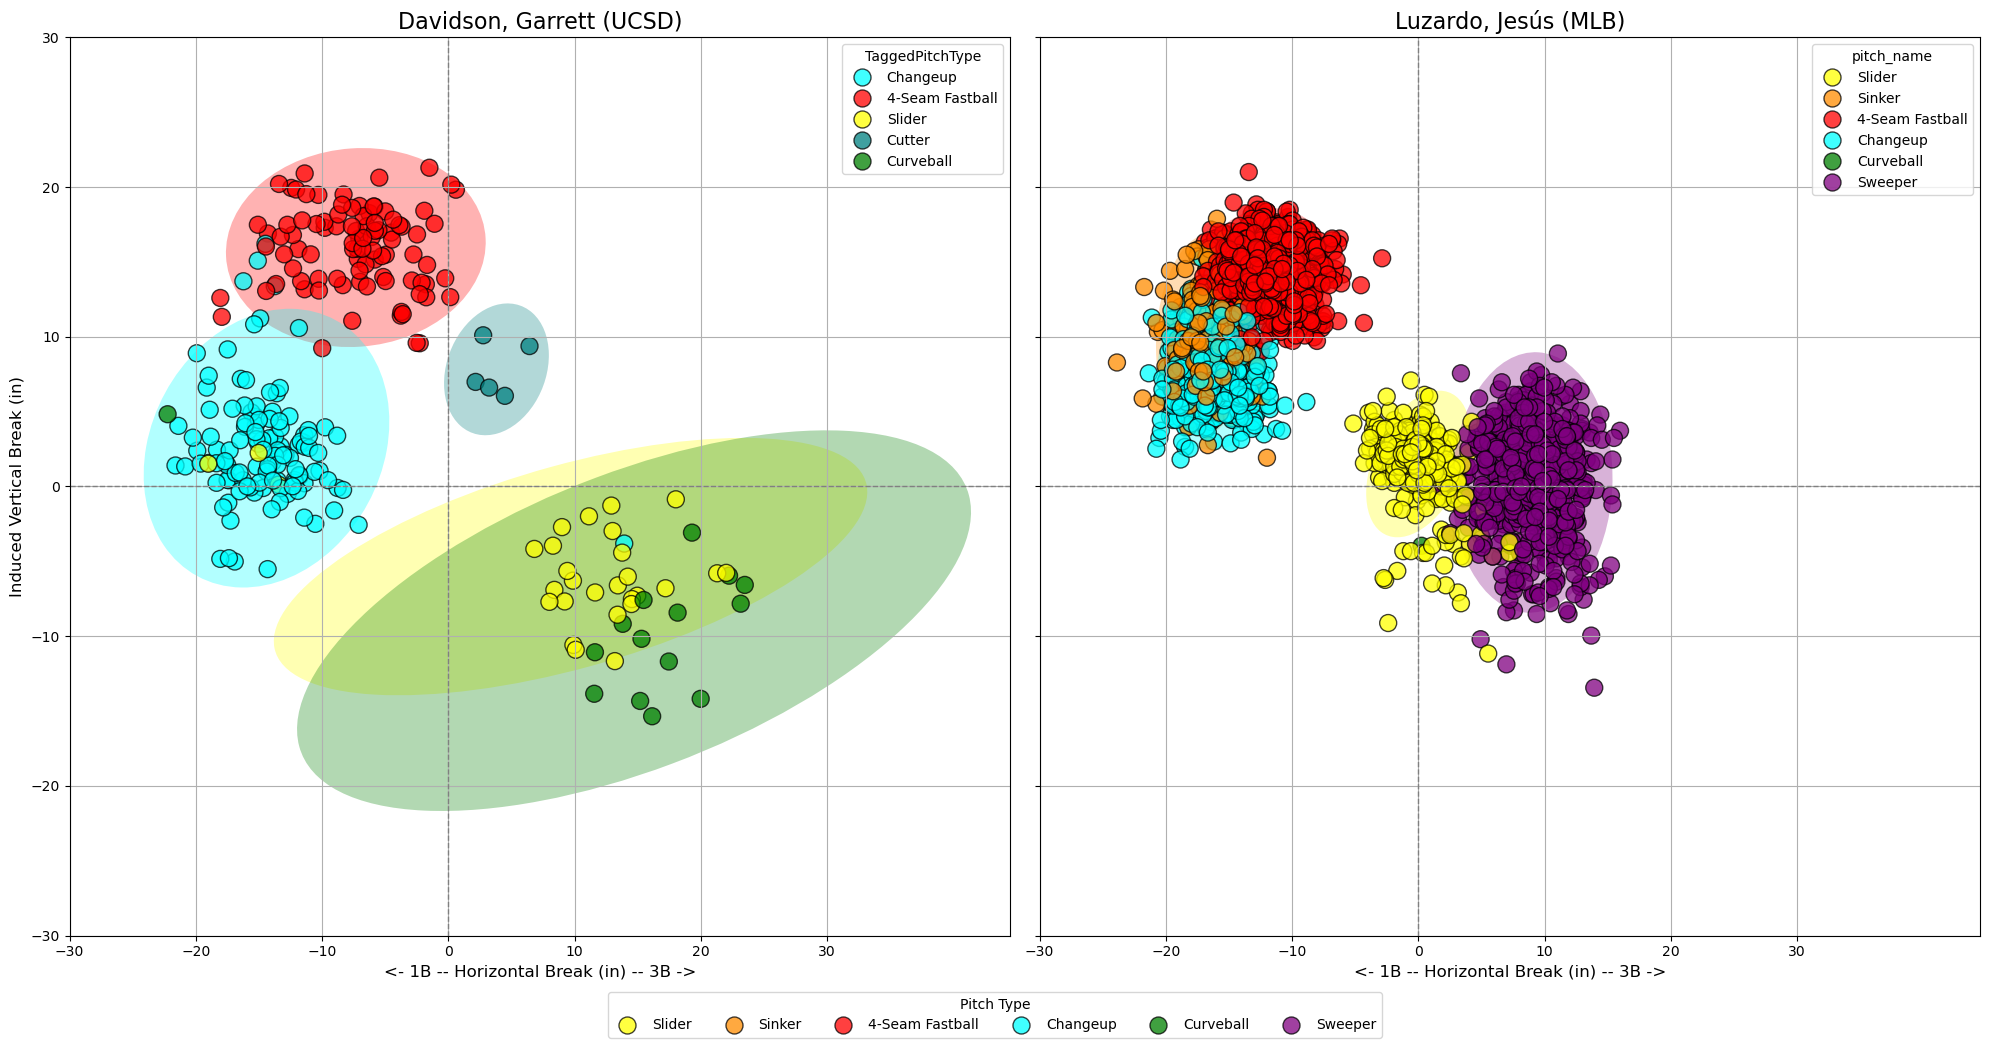

In [227]:
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

def compare_pitchers(ucsd_pitcher, mlb_pitcher, trackman, statcast_data):
    fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

    color_map = {
        '4-Seam Fastball': 'red',
        'Sinker': 'darkorange',
        'Changeup': 'cyan',
        'Slider': 'yellow',
        'Curveball': 'green',
        'Split-Finger': 'brown',
        'Other': 'gray',
        'Sweeper': 'purple',
        'Cutter': 'teal',
        'Screwball': 'pink',
        'Pitch Out': 'white',
        'Knuckleball': 'white',
        'TwoSeamFastBall': 'white',
        'Undefined': 'white',
        'Knuckle Curve': 'white',
        'Slurve': 'white'
    }

    def draw_ellipse(data, ax, color, label=None):
        if len(data) < 5:
            return
        data = np.array(data, dtype=float)
        cov = np.cov(data.T)
        mean = np.mean(data, axis=0)
        lambda_, v = np.linalg.eig(cov)
        lambda_ = np.sqrt(lambda_)
        scale_factor = 2.45  # 95% confidence
        ell = Ellipse(
            xy=mean,
            width=scale_factor * lambda_[0] * 2,
            height=scale_factor * lambda_[1] * 2,
            angle=np.rad2deg(np.arccos(v[0, 0])),
            edgecolor=color,
            facecolor=color,
            alpha=0.3,
            lw=0,
            zorder=0
        )
        ax.add_patch(ell)

    # ---- UCSD Pitcher ----
    ucsd_df = trackman[trackman['Pitcher'] == ucsd_pitcher][['TaggedPitchType', 'InducedVertBreak', 'HorzBreak']].copy()
    ucsd_df['HorzBreak'] = ucsd_df['HorzBreak'] * (-1)
    ax1 = axes[0]
    sns.scatterplot(
        data=ucsd_df, x='HorzBreak', y='InducedVertBreak',
        hue='TaggedPitchType', palette=color_map,
        edgecolor='black', s=150, alpha=0.75, ax=ax1, zorder=1
    )
    for pitch_type, color in color_map.items():
        group = ucsd_df[ucsd_df['TaggedPitchType'] == pitch_type]
        coords = group[['HorzBreak', 'InducedVertBreak']].dropna().to_numpy()
        draw_ellipse(coords, ax1, color)

    ax1.set_title(f"{ucsd_pitcher} (UCSD)", fontsize=16)
    ax1.set_xlabel("<- 1B -- Horizontal Break (in) -- 3B ->", fontsize=12)
    ax1.set_ylabel("Induced Vertical Break (in)", fontsize=12)
    ax1.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax1.axvline(0, color='gray', linestyle='--', linewidth=1)
    ax1.set_xticks(range(-30, 31, 10))
    ax1.set_yticks(range(-30, 31, 10))
    ax1.grid(True)

    # ---- MLB Pitcher ----
    mlb_df = statcast_data[statcast_data['player_name'] == mlb_pitcher][['pitch_name', 'pfx_z', 'pfx_x']].copy()
    mlb_df['pfx_z'] = mlb_df['pfx_z'] * 12
    mlb_df['pfx_x'] = mlb_df['pfx_x'] * (-12)
    mlb_df = mlb_df.dropna(subset=['pitch_name'])
    ax2 = axes[1]
    sns.scatterplot(
        data=mlb_df, x='pfx_x', y='pfx_z',
        hue='pitch_name', palette=color_map,
        edgecolor='black', s=150, alpha=0.75, ax=ax2, zorder=1
    )
    for pitch_type, color in color_map.items():
        group = mlb_df[mlb_df['pitch_name'] == pitch_type]
        coords = group[['pfx_x', 'pfx_z']].dropna().to_numpy()
        draw_ellipse(coords, ax2, color)

    ax2.set_title(f"{mlb_pitcher} (MLB)", fontsize=16)
    ax2.set_xlabel("<- 1B -- Horizontal Break (in) -- 3B ->", fontsize=12)
    ax2.set_ylabel("Induced Vertical Break (in)", fontsize=12)
    ax2.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax2.axvline(0, color='gray', linestyle='--', linewidth=1)
    ax2.set_xticks(range(-30, 31, 10))
    ax2.set_yticks(range(-30, 31, 10))
    ax2.grid(True)

    handles, labels = ax2.get_legend_handles_labels()
    fig.legend(handles, labels, title='Pitch Type', loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.05))
    plt.tight_layout()
    plt.show()


compare_pitchers('Davidson, Garrett', 'Luzardo, Jesús', trackman, statcast_data)

## Calculating Usage Rates & Other Metrics (MLB)

In [200]:
mlb_pitchers.head()

,pitcher,pitch_name,pitcher_name,handedness,count_pitch,spin_rate,release_speed,horz_break,vert_break,extension,spin_axis
0,434378,4-Seam Fastball,"Verlander, Justin",R,1525,2413.517377,93.785246,-8.811541,18.912551,6.01941,207.050492
1,434378,Changeup,"Verlander, Justin",R,299,1754.688963,84.458863,-13.339666,9.406957,6.045485,229.528428
2,434378,Curveball,"Verlander, Justin",R,564,2705.196809,78.056915,7.393404,-12.81234,5.998227,38.251773
3,434378,Sinker,"Verlander, Justin",R,2,2444.0,91.2,-12.0,17.28,5.8,202.5
4,434378,Slider,"Verlander, Justin",R,696,2466.734195,87.179741,3.889828,5.957586,6.048851,170.975575


In [232]:
total_pitches = mlb_pitchers.groupby(['pitcher_name'])[['count_pitch']].sum().reset_index()
total_pitches = total_pitches.rename(columns = {'count_pitch': 'total_pitches'})
mlb_pitchers_master = mlb_pitchers.merge(total_pitches, on = ['pitcher_name'], how = 'left')
mlb_pitchers_master['usage%'] = round((mlb_pitchers_master['count_pitch'] / mlb_pitchers_master['total_pitches']) * 100, 1)
mlb_pitchers_master

,pitcher,pitch_name,pitcher_name,handedness,count_pitch,spin_rate,release_speed,horz_break,vert_break,extension,spin_axis,total_pitches,usage%
0,434378,4-Seam Fastball,"Verlander, Justin",R,1525,2413.517377,93.785246,-8.811541,18.912551,6.01941,207.050492,3188,47.8
1,434378,Changeup,"Verlander, Justin",R,299,1754.688963,84.458863,-13.339666,9.406957,6.045485,229.528428,3188,9.4
2,434378,Curveball,"Verlander, Justin",R,564,2705.196809,78.056915,7.393404,-12.81234,5.998227,38.251773,3188,17.7
3,434378,Sinker,"Verlander, Justin",R,2,2444.0,91.2,-12.0,17.28,5.8,202.5,3188,0.1
4,434378,Slider,"Verlander, Justin",R,696,2466.734195,87.179741,3.889828,5.957586,6.048851,170.975575,3188,21.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6093,829272,4-Seam Fastball,"Ogasawara, Shinnosuke",L,35,2173.657143,90.86,7.494857,15.668571,6.26,142.857143,111,31.5
6094,829272,Changeup,"Ogasawara, Shinnosuke",L,22,1648.363636,80.25,14.514545,8.394545,6.145455,128.227273,111,19.8
6095,829272,Knuckle Curve,"Ogasawara, Shinnosuke",L,28,2720.642857,71.692857,-6.882857,-20.134286,5.964286,342.071429,111,25.2
6096,829272,Slider,"Ogasawara, Shinnosuke",L,23,2454.913043,81.413043,-1.883478,2.13913,6.152174,216.391304,111,20.7
